# 28/10/2023

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
adult_df = pd.read_csv(r'adult_data.csv',
                      header = None, delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


pre processing the data

In [6]:
#create a copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [7]:
adult_df_rev.duplicated().sum()

24

In [8]:
adult_df_rev.drop_duplicates(inplace=True)
adult_df_rev.shape

(32537, 15)

In [9]:
adult_df_rev.drop(["education","fnlwgt"],axis=1,inplace=True)
adult_df_rev.shape

(32537, 13)

In [10]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
adult_df_rev.dtypes
#we have the right data types for the variables so the special characters are suerly not present in the numerical variables

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [12]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})
#To check the unique values in each variable , to detect any unexpected values

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

In [13]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [14]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [15]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

# 29/10/2023

In [16]:
adult_df_rev.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [17]:
#replace the missing values with mode values
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [18]:
adult_df_rev.native_country.mode()[0]
#adult_df_rev.workclass.mode()[0]

'United-States'

In [19]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [20]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""
#when large number of columns are present and filling null value in all column is not possible we can use this approach
#when  column type is object or boolien we use mode  and when column type is int or float we use mean


"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [21]:
#eg.
#Dummies

adult_df_rev_new = pd.get_dummies(adult_df_rev,drop_first=True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
adult_df_rev_new.shape

(32537, 82)

In [23]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [24]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

'''
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
'''

"\n    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\n    print('Feature', x)\n    print('mapping', le_name_mapping)\n"

In [25]:
adult_df_rev.head()
#0-->  <=50K
#1-->  >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [26]:
data={"Gender":["Female", "Male","Female"] }
df=pd.DataFrame(data)
df.head()

,Gender
0,Female
1,Male
2,Female


In [27]:
le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

,Gender
0,0
1,1
2,0


In [28]:
df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender
0,Female
1,Male
2,Female


In [29]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [30]:
X=adult_df_rev.values[:,0:-1]   #--->0 to -2
Y=adult_df_rev.values[:,-1]
#.values will return an array whereas .iloc will return a df object
#arrays are lighter in weight which indirectly help to build the model faster

In [31]:
print(X.shape)
print(Y.shape)

(32537, 12)
(32537,)


In [32]:
#Scaling the data 
#it will make the data unitless and in an uniform range
#there are two ways
#i Normalisation-- MinMaxScaler() Its range is 0 to 1
#ii Standardization --> StandardScaler() Its range is from -3 to 3

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# X=scaler.fit_transform(X)
#print(X)

In [33]:
print(X)

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


In [34]:
#np.set_printoptions(threshold=np.inf)
Y=Y.astype(int)

# 11/04/2023

In [35]:
# Running a basic model
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22775, 12)
(9762, 12)
(22775,)
(9762,)


In [37]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
#fitting training data to the model 
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [38]:
#print(list(zip(Y_test,Y_pred)))

#print(list(zip(adult_df_rev.columns[:,-1],classifier.coef_.ravel())))
#print(classifier.intercept_)
#classifier.coef_

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1296 1070]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048


In [40]:
#Adjusting the threshold

#Strore the predicted probabilties
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.89035269 0.10964731]
 [0.98760641 0.01239359]
 [0.98078365 0.01921635]
 ...
 [0.87474272 0.12525728]
 [0.97246196 0.02753804]
 [0.87430819 0.12569181]]


In [41]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.42:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[6808  588]
 [1077 1289]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7396
           1       0.69      0.54      0.61      2366

    accuracy                           0.83      9762
   macro avg       0.78      0.73      0.75      9762
weighted avg       0.82      0.83      0.82      9762

Accuracy of the model:  0.8294406883835279


In [43]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

#with the intension of choosing a best threshold, choose such a threshold which gives us the lowest total error and the 
# same time lower typeII error.
#0.46 is the best threshold for this data so any future predictions should be done on same threshold

Errors at threshold  0.4 : 1672  , type 2 error : 1022  , type 1 error: 650
Errors at threshold  0.41000000000000003 : 1657  , type 2 error : 1047  , type 1 error: 610
Errors at threshold  0.42000000000000004 : 1665  , type 2 error : 1077  , type 1 error: 588
Errors at threshold  0.43000000000000005 : 1662  , type 2 error : 1103  , type 1 error: 559
Errors at threshold  0.44000000000000006 : 1652  , type 2 error : 1127  , type 1 error: 525
Errors at threshold  0.45000000000000007 : 1648  , type 2 error : 1147  , type 1 error: 501
Errors at threshold  0.4600000000000001 : 1642  , type 2 error : 1174  , type 1 error: 468
Errors at threshold  0.4700000000000001 : 1649  , type 2 error : 1202  , type 1 error: 447
Errors at threshold  0.4800000000000001 : 1668  , type 2 error : 1241  , type 1 error: 427
Errors at threshold  0.4900000000000001 : 1667  , type 2 error : 1265  , type 1 error: 402
Errors at threshold  0.5000000000000001 : 1680  , type 2 error : 1296  , type 1 error: 384
Errors at

''''Steps for classification:
1. *Create the dataframe properly-->pd.read_csv(),pd.read_excel()
2. Preprocessing the data:
a. Feature selection-->domain knowledge-->drop()
b. *Handling missing values-->df.isnull().sum(),dropna(),fillna()
c. Outlier handling[Optional]-->boxplot()
3. *Converting categorical data to numerical-->map(),pd.get_dummies(),OneHotEncoder(),LabelEncoder()
4. *Create X and Y-->X=df.values[:,:-1], Y=df.values[:,-1]
5. Scaling the data[Optional]-->StandardScaler(),MinMaxScaler()
6. *Splitting the data into train and test(validation)-->train_test_split()
7. *Building the model:
a. Create the model-->obj=AlgoName()
b. Train the model-->obj.fit(X_train, Y_train)
c. Predict using the model-->Y_pred=obj.predict(X_test)
8. *Evaluating the model:
a. confusion_matrix(Y_test,Y_pred)
b. accuracy_score(Y_test,Y_pred)
c. classification_report(Y_test,Y_pred)
9. *Tuning the model:
a. Feature selection
b. Dedicated approach-->Adjustment of threshold
c. Stochastic Gradient Descent
 
 
-----------------------------
 
Model is ready--classifier-->adult_data.csv
 
Follow the steps on the adult_test.csv:
1. Create a dataframe properly-->adult_test
2. Preprocessing the data:
a. Feature selection-->eliminate fnlwgt,education
b. Handling the missing values
3. Converting categorical values to numerical
4. Create X_test_new and Y_test_new
5. Scaling the data-->X_test_new-->X_test_new=scaler.transform(X_test_new),fit() not to be implemented
6. Y_pred_prob=classifier.predict_proba(X_test_new)
7. Use the if-else code with threshold=0.46(optimum) and generate Y_pred_new
8. Evaluating the model:
a. confusion_matrix(Y_test_new,Y_pred_new)
b. accuracy_score(Y_test_new,Y_pred_new)
c. classification_report(Y_test_new,Y_pred_new)''''''

# 18-11-2023

In [44]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
 
print(auc)
 
# roc -- Receiver Operating Characterstics


0.8613964871921356


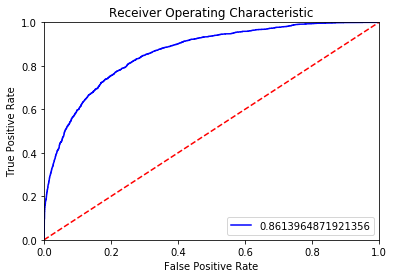

In [45]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()



In [46]:
from sklearn import metrics
#y_pred_class is the list of predicted values  on the basis of 0.46 threshold 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)
 

0.7326494593728442
[0.         0.07950243 1.        ]
[0.         0.54480135 1.        ]


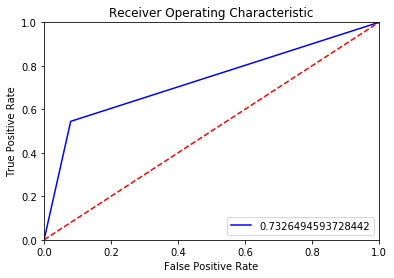

In [47]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC.

# 25-11-2023

In [48]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


[0.81957858 0.82835821 0.82791923 0.81562774 0.82001756 0.82345191
 0.82345191 0.82784365 0.82301274 0.81774264]
0.8227004171577977


In [49]:
#model tuning
 
 
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
 
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
#this code is suppose to be used when we see a drastic difference in the kfold accuracy and our base model accuracy

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7007  389]
 [1293 1073]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.827699241958615


In [51]:
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


[0.82221247 0.82923617 0.82440737 0.81562774 0.81562774 0.81598595
 0.83662714 0.82608696 0.82476943 0.82301274]
0.8233593714755679


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7007  389]
 [1293 1073]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.827699241958615


Recursive Feature Elimination: 1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model. 2nd-(X-1) variables will be considered and the model will be rebuilt. The process continues till the time we are left off with the given no of variables in the model. RFE model will be ready to predict upon the testing data.

---------------



In [53]:
# Running a basic model
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

In [55]:
colname=adult_df_rev.columns


from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=8)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


In [71]:
?rfe


In [56]:
Y_pred = model_rfe.predict(X_test)
#print(list(zip(Y_test)))

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7014  382]
 [1281 1085]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8296455644335177


In [91]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""
#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the variables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs)
sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)
#Use SFS to select the top features 
feature_names=adult_df_rev.columns[:-1]
sffs.fit(X_train, Y_train)
 
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

#Sfs is a forward feature selection technique 
#where it iteratively starts wih one variable and keeps on adding variables one by one to the model
#it performs a cross validation process to identify which combination of variables return the highest cv accuracy
#we can select the best combination of variables and proceed to build the model using the manually approach

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)","[0.8008781558726674, 0.801536772777168, 0.8017...",0.799605,"(8,)"
2,"(8, 9)","[0.8059275521405049, 0.8182217343578485, 0.814...",0.811811,"(8, 9)"
3,"(1, 8, 9)","[0.8065861690450055, 0.8171240395170143, 0.814...",0.811592,"(1, 8, 9)"
4,"(1, 8, 9, 11)","[0.8052689352360044, 0.817563117453348, 0.8129...",0.81067,"(1, 8, 9, 11)"
5,"(1, 2, 8, 9, 11)","[0.8074643249176728, 0.8118551042810099, 0.814...",0.809308,"(1, 2, 8, 9, 11)"
6,"(1, 2, 5, 8, 9, 11)","[0.8162458836443469, 0.8239297475301867, 0.818...",0.818793,"(1, 2, 5, 8, 9, 11)"
7,"(1, 2, 5, 7, 8, 9, 11)","[0.8217343578485181, 0.8252469813391877, 0.822...",0.821603,"(1, 2, 5, 7, 8, 9, 11)"
8,"(1, 2, 5, 7, 8, 9, 10, 11)","[0.8151481888035126, 0.827661909989023, 0.8239...",0.82371,"(1, 2, 5, 7, 8, 9, 10, 11)"
9,"(0, 1, 2, 5, 7, 8, 9, 10, 11)","[0.8199780461031834, 0.8261251372118551, 0.825...",0.823754,"(0, 1, 2, 5, 7, 8, 9, 10, 11)"
10,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)","[0.8206366630076839, 0.8287596048298573, 0.825...",0.824457,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)"


In [59]:
X = adult_df_rev.values[:,[0,1,2,5,6,7,8,9,10,11]]
Y = adult_df_rev.values[:,-1]

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [61]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

In [62]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
#fitting training data to the model 
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7051  345]
 [1313 1053]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.75      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.80      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8301577545584922


# Feature selection using Univariate 

In [133]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]



In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
test = SelectKBest(score_func=chi2,k=10)
fit1 = test.fit(X, Y)
 
colname=adult_df_rev.columns
 
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X_new = fit1.transform(X)

#SELECTKBest use the chi2 variable test to find the association of all the x variables with respect to Y.
#Based on the K value provided it will subset K top chisquare valued variables  and
#writen us the subseted data where the model building approach would be manual
#this technique is preferred when we have more of categorical variable

[8.59031713e+03 9.41445133e-02 2.39903589e+03 1.12172183e+03
 9.96668120e+01 3.65821506e+03 3.30121759e+01 5.01968535e+02
 8.21362443e+07 1.37062169e+06 6.46886542e+03 1.70998658e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [135]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_new)
X = scaler.transform(X_new)



In [136]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)



In [137]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
#fitting training data to the model 
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)



[0 0 0 ... 0 0 0]


In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7015  381]
 [1281 1085]]

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8297480024585125


In [142]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]



In [143]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.2)
fit1 = vt.fit(X, Y)
print(fit1.variances_)
 
features = fit1.transform(X)
print(features.shape[1])
print(list(zip(adult_df_rev.columns,fit1.get_support())))

#Variance threshold identifies the variance of each x variables and 
#eliminates those variables which have a variance lower than the set threshold
#by default it will eliminate only those variance which has 0 variety (singular data) 
#usually the max threshold that we try to set is upto  .2 which indicates eliminate those variable which have less than 20 percent variety in the data

[1.85988878e+02 1.22662712e+00 6.61309308e+00 2.26887148e+00
 1.57856209e+01 2.58257530e+00 7.20519181e-01 2.21358466e-01
 5.45802374e+07 1.62486094e+05 1.52440987e+02 3.66475626e+01]
12
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [144]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
X = scaler.transform(features)


In [145]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)



In [146]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression()
#fitting training data to the model 
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)



[0 0 0 ... 0 0 0]


In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7012  384]
 [1296 1070]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8279041180086048
